In [102]:
import networkx as nx

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
%matplotlib inline

In [105]:
import matplotlib.pyplot as plt

df_nodes = pd.read_csv('../input/stack_network_nodes.csv')
df_edges = pd.read_csv('../input/stack_network_links.csv')

In [34]:
topics = ["objective", "feature selection", "feature engineering", "model selection" ]
node_locs1 = [0,0,1,1]
node_locs2 = [0,1,0,1]

#for triplet in zip()

In [17]:
node_locs = list(zip(node_locs1,node_locs2))

In [18]:
node_locs

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [36]:
G = nx.Graph()

In [38]:
for topic in topics:
    G.add_node(topic, nodesize=2)

In [39]:
G.number_of_nodes()

4

In [42]:
G

TypeError: 'dict' object is not callable

In [ ]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

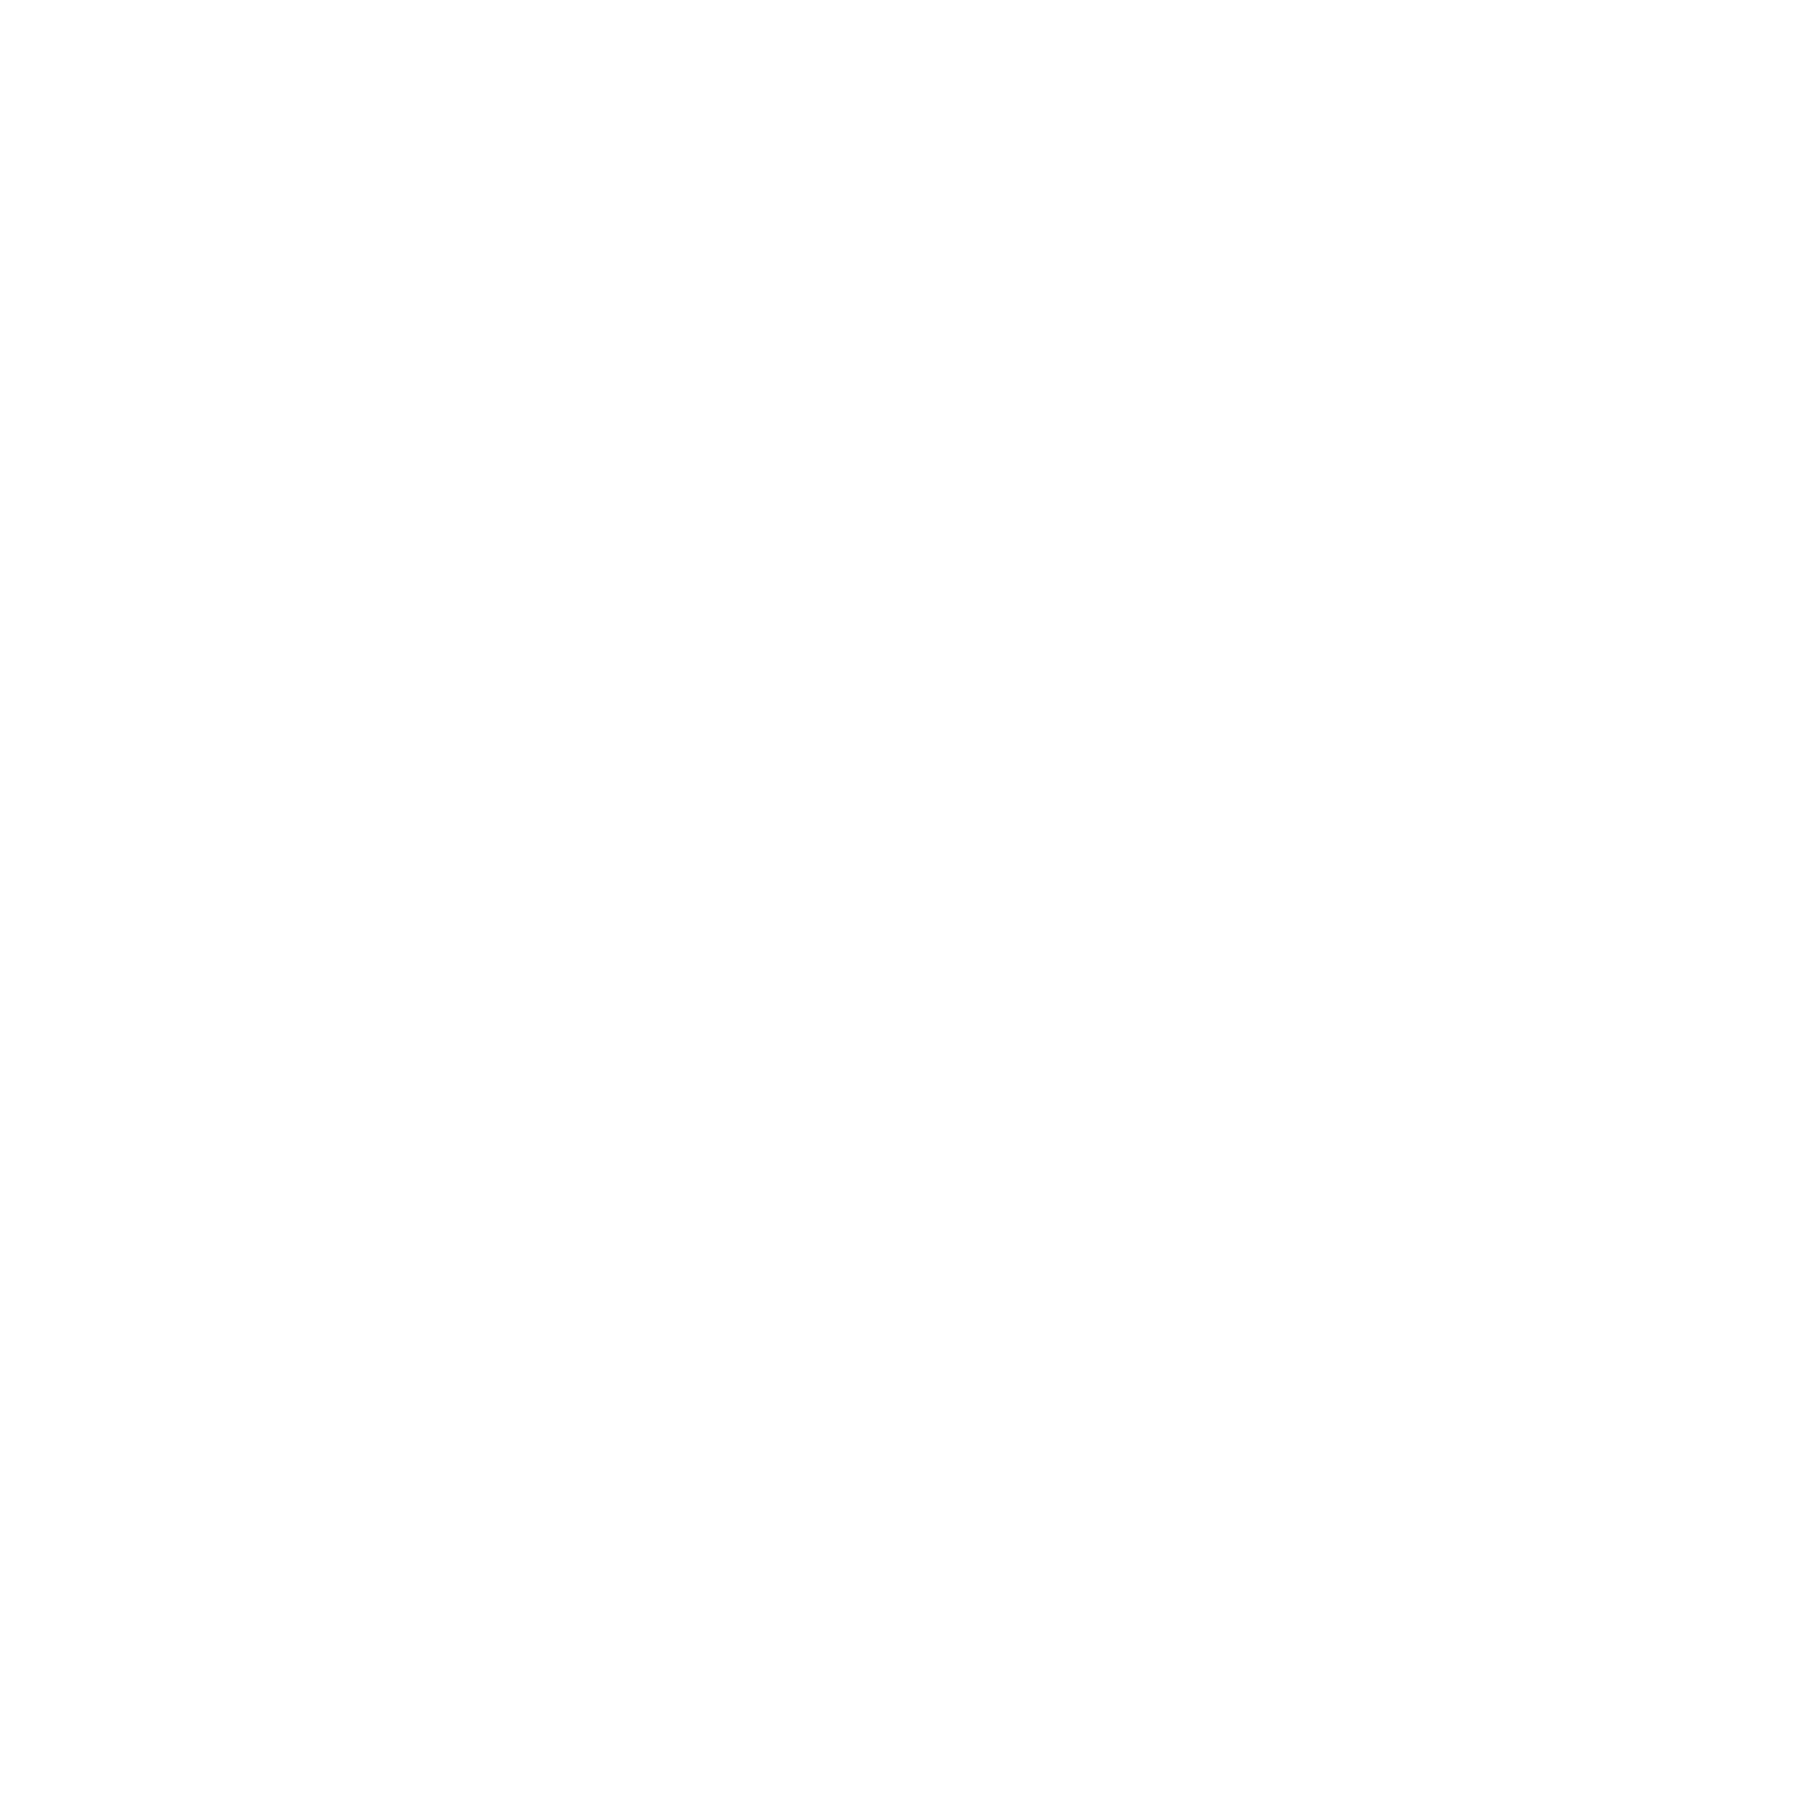

In [14]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
#ax.collections[0].set_edgecolor("#555555") 
plt.show()

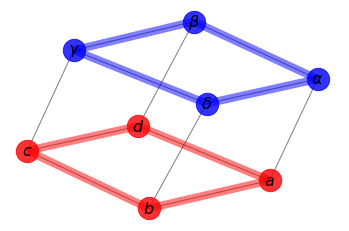

In [43]:
G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, alpha=0.5, edge_color='b')


# some math labels
labels = {}
labels[0] = r'$a$'
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()


In [100]:
import numpy as np

In [158]:
topics = ["objective", "feature"+"\n"+"selection", "feature"+"\n"+"engineering", "model"+"\n"+"selection"]
'''
node_locs1 = [-1,-1,1,1]
node_locs2 = [-1,1,-1,1]
'''
'''
node_locs1 = [0,-1,1, 0]
#, 3,-3]
node_locs2 = [1, 0,0,-1]
#, 0, 0]

'''
node_locs1 = [0.0,-0.5,0.5, 0]
#, 3,-3]
node_locs2 = [0.20, 0.5,0.5,-np.sqrt(3)/4]
#, 0, 0]

node_locs = list(zip(node_locs1,node_locs2))

G = nx.DiGraph()
'''
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)
'''
for t1 in topics[:4]:
    for t2 in topics[1:4]:
        G.add_edge(t1, t2, weight=0.3)
        G.add_edge(t2, t1, weight=0.3)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes
pos = {}
for pair in zip(topics, node_locs):
    pos.update({pair[0]:np.array(pair[1])})
print(pos)

{'objective': array([0. , 0.2]), 'feature\nselection': array([-0.5,  0.5]), 'feature\nengineering': array([0.5, 0.5]), 'model\nselection': array([ 0.       , -0.4330127])}


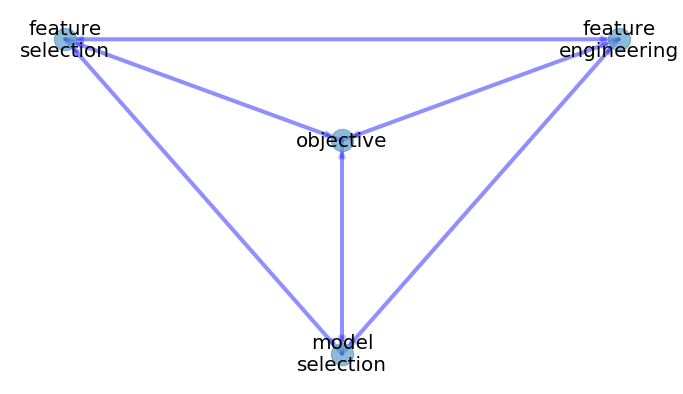

In [159]:
plt.figure(figsize=(12,7))
# nodes
nx.draw_networkx_nodes(G, pos, alpha=0.5, node_size=500)

# edges
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=4, alpha=0.25, edge_color='b', style='dashed', arrows=True)

# labels
'''new_pos = {}
for k,v in pos.items():
    
    if len(k.split())>1:
        splitted = k.split()
        splitted = str(splitted[0]+"\n"+splitted[1])
    else:
        splitted=k
    print(splitted)
    new_pos.update({splitted:v})
print(new_pos)
'''
    
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.savefig('./figures/selection_process_ML_triangle.png')
plt.show()

In [152]:
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

A = to_agraph(G)
#print(A)
A.layout('dot')
#A.render('./figures/selection_graph_in_ML_2', view=False, format='png'); 
A.draw('./figures/selection_graph_in_ML_2.png', format='png')

In [137]:
G = nx.DiGraph()
G.add_node("A",rank=0)
G.add_nodes_from(['B','C','D'],style='filled',fillcolor='red')
G.add_nodes_from(['D','F','G'])
G.add_nodes_from(['H'],label='target')
G.add_edge('A','B',arrowsize=2.0)
G.add_edge('A','C',penwidth=2.0)
G.add_edge('A','D')

G.add_edges_from([('B','E'),('B','F')],color='blue')
G.add_edges_from([('C','E'),('C','G')])
G.add_edges_from([('D','F'),('D','G')])
G.add_edges_from([('E','H'),('F','H'),('G','H')])

# set defaults
G.graph['graph']={'rankdir':'TD'}
G.graph['node']={'shape':'circle'}
G.graph['edges']={'arrowsize':'4.0'}

A = to_agraph(G)
#print(A)
A.layout('dot')
A.draw('./abcd.png')

In [157]:
topics = ["objective", "feature"+"\n"+"selection", "feature"+"\n"+"engineering", "model"+"\n"+"selection"]
node_locs1 = [0.0,-0.5,0.5, 0]
node_locs2 = [0.0, 0.5,0.5,-np.sqrt(3)/4]

featsel="feature"+"\n"+"selection"
feateng="feature"+"\n"+"engineering"

G = nx.DiGraph()
#G.add_node("A",rank=0)
#G.add_nodes_from(['B','C','D'],style='filled',fillcolor='red')
G.add_nodes_from(['B','C'],pos=[[]],style='filled',fillcolor='red',rank=0)
#G.add_nodes_from(['D','F','G'])
G.add_node('B',pos=[-1,0],style='filled',fillcolor='red',rank=0)
G.add_node('C',pos=[1,1],style='filled',fillcolor='blue',rank=0)
G.add_node("E",pos=[0,0],label='objective',rank=0)

G.add_nodes_from(['H'],label='target', rank=10)
#G.add_edge('A','B',arrowsize=2.0)
#G.add_edge('A','C',penwidth=2.0)
#G.add_edge('A','D')

'''G.add_edges_from([('B','E'),('B','F')],color='blue')
G.add_edges_from([('C','E'),('C','G')])
G.add_edges_from([('D','F'),('D','G')])
G.add_edges_from([('E','H'),('F','H'),('G','H')])
'''
#G.add_edge('B','C',arrowsize=2.0, direction='both')
G.add_edges_from([('B','C')],arrowsize=1.0, direction='both')
G.add_edges_from([('B','E'),('B','H')],color='blue')
G.add_edges_from([('C','E'),('C','H')])
G.add_edges_from([('E','H')])

# set defaults
#G.graph['graph']={'rankdir':'TD'}
G.graph['node']={'shape':'circle'}
G.graph['edges']={'arrowsize':'4.0'}

A = to_agraph(G)
#print(A)
A.layout('dot')
A.draw('./abcd.png')

In [48]:
from graphviz import Digraph,Source

g = Digraph('G', filename='ML_selection_graph', \
            engine='sfdp', format='png', directory='./')

topics = ["objective", 
          "feature"+"\n"+"selection", 
          "feature"+"\n"+"engineering", 
          "model"+"\n"+"selection"]

for m in range(4):
    for n in range(m+1,4):
        g.edge(topics[m], topics[n], _attributes={'dir':'both'})

g.save()
g.view()#filename='ML_selection_graph')
#graph = Source(g, filename='gv-test', format='png', directory='./') 
#graph.save();

'./ML_selection_graph.png'

In [34]:
g.

graphviz.dot.Digraph

In [39]:
import pydotplus

pydot_graph = pydotplus.graph_from_dot_data(g.source)
pydot_graph.write_png('./original_tree.png')
#pydot_graph.set_size('"5,2"')
pydot_graph.set_ratio('"0.5"')
pydot_graph.write_png('./resized_tree.png')

True

In [40]:

dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot.render('test-output/round-table.gv', view=True)  

'test-output/round-table.gv.pdf'

In [98]:
topics = ["objective", 
          "feature"+"\n"+"selection", 
          "feature"+"\n"+"engineering", 
          "model"+"\n"+"selection"]


dot = Digraph(comment='The Round Table')

dot.node('S', "feature"+"\n"+"selection")
dot.node('O', 'objective')
dot.node('E', "feature"+"\n"+"engineering")
dot.node('M', "model"+"\n"+"selection")

#dot.edges(['AB', 'AL', 'AC'])
dot.edge('E', 'S', constraint='true', dir='both')
dot.edge('E', 'O', constraint='true', dir='both')
dot.edge('E', 'M', constraint='true', dir='both')

dot.edge('S', 'O', constraint='true', dir='both')
dot.edge('O', 'M', constraint='true', dir='both')

dot.edge('S', 'M', constraint='true', dir='both')

#dot.render('test-output/round-table.gv', view=True, format='png')  

with dot.subgraph() as s:
    s.attr(rank = 'same')
    for n in ['S','E']: s.node(n)
    s.attr(rank = 'min')
    s.node('M')

dot.render('./figures/selection_graph_in_ML', view=False, format='png'); 